In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import tensorflow as tf

In [7]:
path_of_car="car1.jpeg"

In [19]:
def read_img(path, grayscale=True):
    car=cv2.imread(path)
    if grayscale:
        car=cv2.cvtColor(car, cv2.COLOR_BGR2GRAY)
        plt.imshow(car, cmap="gray")
        return car
    color_car=cv2.cvtColor(car, cv2.COLOR_BGR2RGB)
    plt.imshow(color_car)
    return color_car
    
    

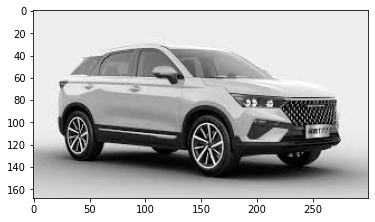

In [21]:
gray_car=read_img(path_of_car)

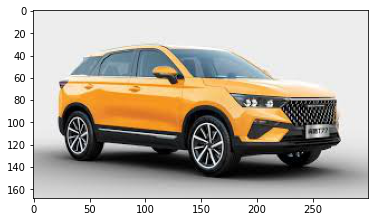

In [41]:
color_car=read_img(path_of_car, grayscale=False)

In [23]:
gray_car.shape


(168, 300)

In [27]:
row,col=gray_car.shape
gray_car=gray_car.reshape(1,row,col,1)

In [24]:
color_car.shape

(168, 300, 3)

In [28]:
CONV_LAYER=[tf.keras.layers.Conv2D(filters=1, kernel_size=(3,3), strides=(1,1), input_shape=gray_car.shape[1:])]
conv_model=tf.keras.Sequential(CONV_LAYER)
conv_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 166, 298, 1)       10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [29]:
out=conv_model.predict(gray_car)

In [30]:
out.shape

(1, 166, 298, 1)

In [33]:
row,col=out.shape[1:-1]
out_reshape=out.reshape(row,col)

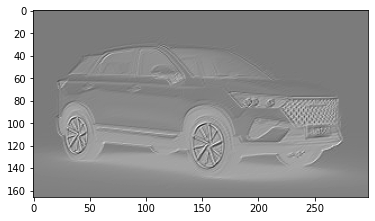

In [35]:
plt.imshow(out_reshape, cmap="gray")

In [42]:
row,col,depth=color_car.shape
color_car=color_car.reshape(1,row,col,depth)
color_car.shape

(1, 168, 300, 3)

In [46]:
CONV_LAYER=[tf.keras.layers.Conv2D(filters=1,
                                 kernel_size=(3,3),
                                    strides=(1,1),
                                               input_shape=color_car.shape[1:])]
convo_model=tf.keras.Sequential(CONV_LAYER)
convo_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 166, 298, 1)       28        
                                                                 
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


In [48]:
color_out=convo_model.predict(color_car)

In [49]:
color_out.shape

(1, 166, 298, 1)

In [50]:
row,col=color_out.shape[1:-1]

In [51]:
out_reshape=color_out.reshape(row,col)

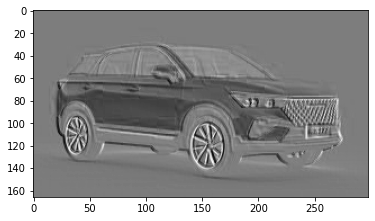

In [54]:
plt.imshow(out_reshape,cmap="gray")

In [53]:
out_reshape.shape

(166, 298)